# PLAYSTORE  ANALYSIS  USING  PYTHON
**By:**

**Santhosh M**

  BE- Computer Science Engineering 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("playstore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
df.size

140933

In [6]:
df.shape

(10841, 13)

# Task 1: Data clean up - Missing value treatment

### A.Drop  records  where  rating  is  missing  since  rating  is  our  target/study  variable

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
df.dropna(how = "any", subset=["Rating"],axis = 0, inplace = True)

In [9]:
df["Rating"].isnull().sum()

0

### B. Check the null values for the Android Ver column.

**i. Are all 3 records having the same problem?**

In [10]:
df.loc[df["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


# Yes,all 3 record are having same problem.ie,All are NaN.

**ii. Drop the 3rd record i.e. record for “Life Made WIFI …”**

In [11]:
df.drop([10472],inplace = True)

In [12]:
df.loc[df["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


**iii. Replace remaining missing values with the mode**

In [13]:
df["Android Ver"].describe()

count           9364
unique            31
top       4.1 and up
freq            2059
Name: Android Ver, dtype: object

In [14]:
df["Android Ver"] = df["Android Ver"].fillna(31)

### C. Current ver – replace with most common value

In [15]:
df["Current Ver"].describe()

count                   9362
unique                  2638
top       Varies with device
freq                    1415
Name: Current Ver, dtype: object

In [16]:
df["Current Ver"] = df["Current Ver"].fillna(2638)

In [17]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Task 2. Data clean up – correcting the data types

### a. Which all variables need to be brought to numeric types?

## Review and installs need to brought to numeric types.

### b. Price variable – remove $ sign and convert to float

In [18]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [19]:
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].astype(float)

### C. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [20]:
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = df['Installs'].astype(int)

### d. Convert all other identified columns to numeric

In [21]:
df['Reviews'] = df['Reviews'].astype(int)

In [22]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [23]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Task 3. Sanity checks – check for the following and handle accordingly

### a. Avg. rating should be between 1 and 5, as only these values are allowed on the playstore.

**i. Are there any such records? Drop if so**

In [24]:
df.loc[df.Rating < 1] & df.loc[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## There are no such records with rating less than 1 or greater than 5

### b. Reviews should not be more than installs as only those who installed can review the app.

**i. Are there any such records? Drop if so.**

In [25]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


## Yes, there are 7 records where Review is greater than Installs.

In [26]:
temp = df.loc[df['Reviews'] > df['Installs']].index

In [27]:
df.drop(labels = temp , inplace = True)

In [28]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# Task 4. Identify and handle outliers :

### a. Price column

**i. Make suitable plot to identify outliers in price**

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

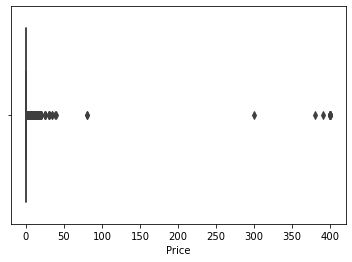

In [29]:
sns.boxplot(df["Price"])

#### ii.Do you expect apps on the play store to cost $200? Check out these cases

In [30]:
df.loc[df['Price'] == 200]
print('NO we cannot expect apps on the play store to cost $200')

NO we cannot expect apps on the play store to cost $200


#### iii. After dropping the useless records, make the suitable plot again to identify outliers

In [31]:
val = df["Price"].values< 1
df1 = df[val]


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

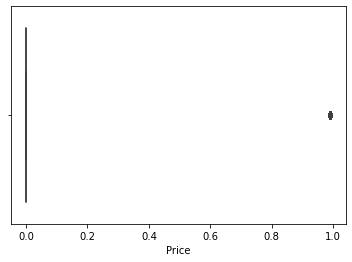

In [32]:
sns.boxplot(df1["Price"])

#### iv. Limit data to records with price < $30

In [33]:
temp_1= df[df['Price'] > 30].index
df.drop(labels=temp_1, inplace=True)

In [34]:
count = df.loc[df['Price'] > 30].index
count.value_counts().sum()

0

### b. Reviews column

#### i. Make suitable plot

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

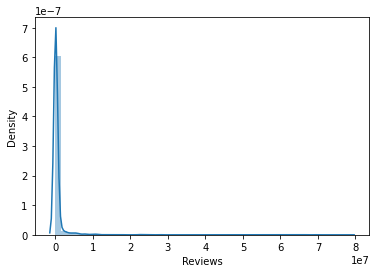

In [35]:
sns.distplot(df["Reviews"])

#### ii. Limit data to apps with < 1 Million reviews

In [36]:
temp_2 = df[df["Reviews"] > 1000000].index
df.drop(labels = temp_2 , inplace = True)
print(temp_2.value_counts().sum(),'columns dropped')

704 columns dropped


### c. Installs

#### i. What is the 95th percentile of the installs?

In [37]:
percent = df["Installs"].quantile(0.95)
print(percent)

10000000.0


#### ii. Drop records having a value more than the 95th percentile

In [38]:
temp_3 =df[df["Installs"].astype(int) > percent].index
df.drop(labels = temp_3, inplace = True)

# Data analysis to answer business questions

# Task 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

### a. How do you explain this?

In [39]:
df["Rating"].describe()

count    8435.000000
mean        4.170800
std         0.533864
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

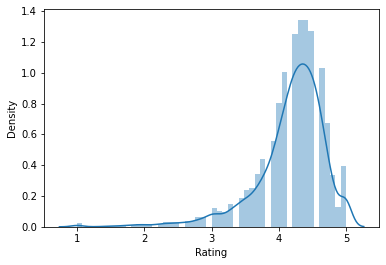

In [40]:
sns.distplot(df["Rating"])

In [41]:
skew = df["Rating"].skew()
mean = df["Rating"].mean()
median = df["Rating"].median()
print("the skewness of this distibution is""(",skew,")"
    "the mean value is""(",mean,")"
    "the median value is""(",median,")")

print("the median is greater then mean")

the skewness of this distibution is( -1.7434270330647985 )the mean value is( 4.170800237107298 )the median value is( 4.3 )
the median is greater then mean


### b. What is the implication of this on your analysis?

In [42]:
mode = df["Rating"].mode()
mode

0    4.3
dtype: float64

In [43]:
print("MODE >= MEDIAN > MEAN")
print(mode,">=",median,">",mean)
print("1.The distribution of Rating is negatively(-ve) skewed")
print("2.distribution of Rating is more Skewed towards lower values")

MODE >= MEDIAN > MEAN
0    4.3
dtype: float64 >= 4.3 > 4.170800237107298
1.The distribution of Rating is negatively(-ve) skewed
2.distribution of Rating is more Skewed towards lower values


# Task 6. What are the top Content Rating values?

### a. Are there any values with very few records?

In [44]:
df["Content Rating"].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

## YES,adults only 18+ and unrated are with very few records.

### b. If yes, drop those as they won’t help in the analysis

In [45]:
df.drop(df.index[df['Content Rating'] == 'Adults only 18+'], inplace = True)
df.drop(df.index[df['Content Rating'] == 'Unrated'], inplace = True)

In [46]:
df["Content Rating"].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

# Task 7. Effect of size on rating

### a. Make a joinplot to understand the effect of size on rating

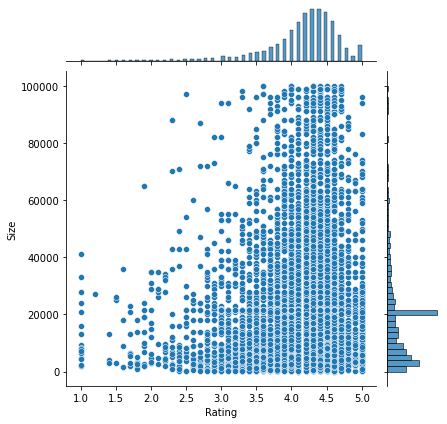

In [47]:
sns.jointplot(y ='Size', x ='Rating', data = df,  kind ='scatter')
plt.show()

### b. Do you see any patterns?

## Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating.

### c. How do you explain the pattern?

## Generally on increasing Rating, Size of App also increases. But this is not always true ie. for higher Rating, their is constant Size. Thus we can conclude that their is positive correlation between Size and Rating.

# Task 8. Effect of price on rating

### a. Make a jointplot (with regression line)

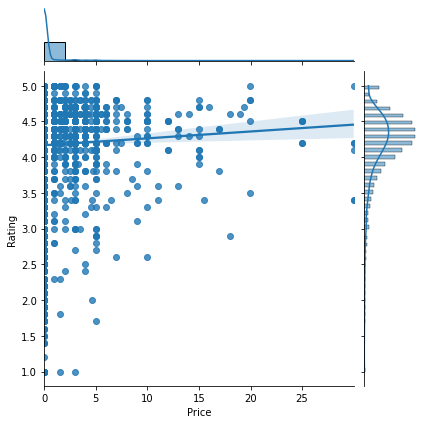

In [48]:
sns.jointplot(x='Price', y='Rating', data=df, kind='reg')
plt.show()

### b. What pattern do you see?

## Here increasing the Price, Rating remains almost constant greater than 4.

### c. How do you explain the pattern?

## Since on increasing the Price, Rating is almost constant greater than four. So it can be  very weak Positive correlation between Rating and Price.

In [49]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204667,0.736038,-0.073446
Size,0.058076,0.204667,1.000000,0.190741,-0.001054
Installs,0.118414,0.736038,0.190741,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


### d. Replot the data, this time with only records with price > 0

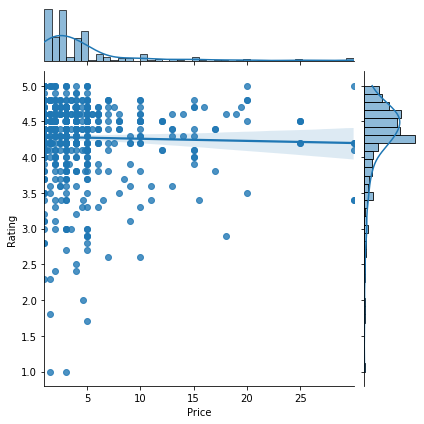

In [50]:
replot = df.loc[df["Price"]>0]
sns.jointplot(x='Price', y='Rating', data=replot, kind='reg')
plt.show()

### e. Does the pattern change?

## Yes, limiting the record with Price > 0, the overall pattern changed

### f. What is your overall inference on the effect of price on the rating

## Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4

# Task 9. Look at all the numeric interactions together 

### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

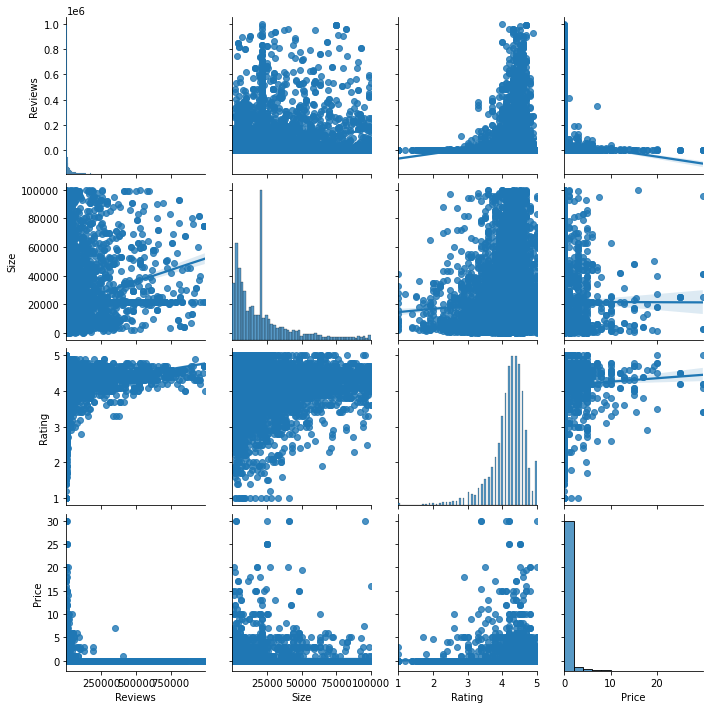

In [51]:
sns.pairplot(df, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

# Task 10. Rating vs. content rating

### a. Make a bar plot displaying the rating for each content rating

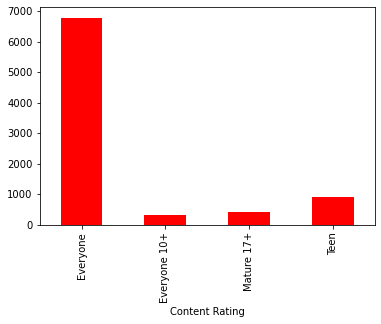

In [52]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="red")
plt.show()

### b. Which metric would you use? Mean? Median? Some other quantile?

## We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

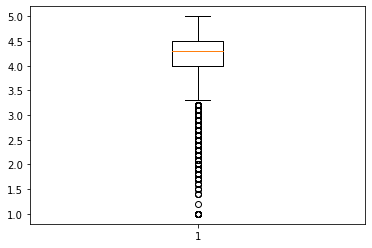

In [53]:
plt.boxplot(df['Rating'])
plt.show()

### c. Choose the right metric and plot

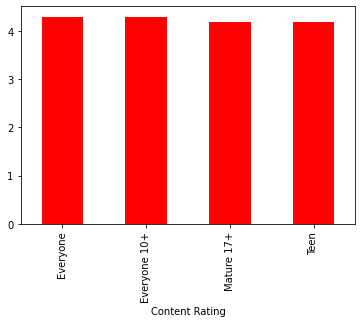

In [54]:
df.groupby(['Content Rating'])['Rating'].median().plot.bar(color="red")
plt.show()

# Task 11. Content rating vs. size vs. rating – 3 variables at a time

### a. Create 5 buckets (20% records in each) based on Size

In [55]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [56]:
temp_4 = pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp_4

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


### c. Make a heatmap of this

#### i. Annotated

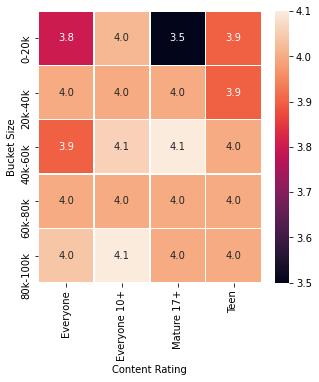

In [57]:
h,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp_4, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

#### ii. Greens color map

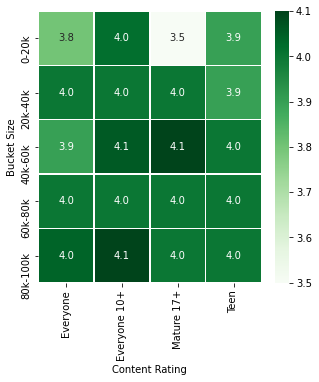

In [58]:
h,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp_4, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

## Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 60k-80k and 80k-100k have got the highest rating in all categories. So,heavier apps are prefered in all categories.

***THANK YOU*** 